In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from pathlib import Path

In [58]:
project_dir = str(Path.cwd().parent)
train_image_dir = os.path.join(project_dir, "data\\train")
test_image_dir = os.path.join(project_dir, "data\\test")
val_image_dir = os.path.join(project_dir, "data\\validation")

In [59]:
def create_df(dir):
    df = pd.DataFrame(columns=["image", "label"])

    index = 0
    for item in os.listdir(dir):
        item_dir = os.path.join(dir, item)
        for image_name in os.listdir(item_dir):
            image_path = os.path.join(item_dir, image_name)
            df.loc[index, "image"] = image_path
            df.loc[index, "label"] = item
            index += 1
    
    return df

In [60]:
df_train = create_df(train_image_dir)
df_test = create_df(test_image_dir)
df_val = create_df(val_image_dir)
print(f"train shape:{df_train.shape}\ntest shape:{df_test.shape}\nval shape:{df_val.shape}")

train shape:(3115, 2)
test shape:(359, 2)
val shape:(351, 2)


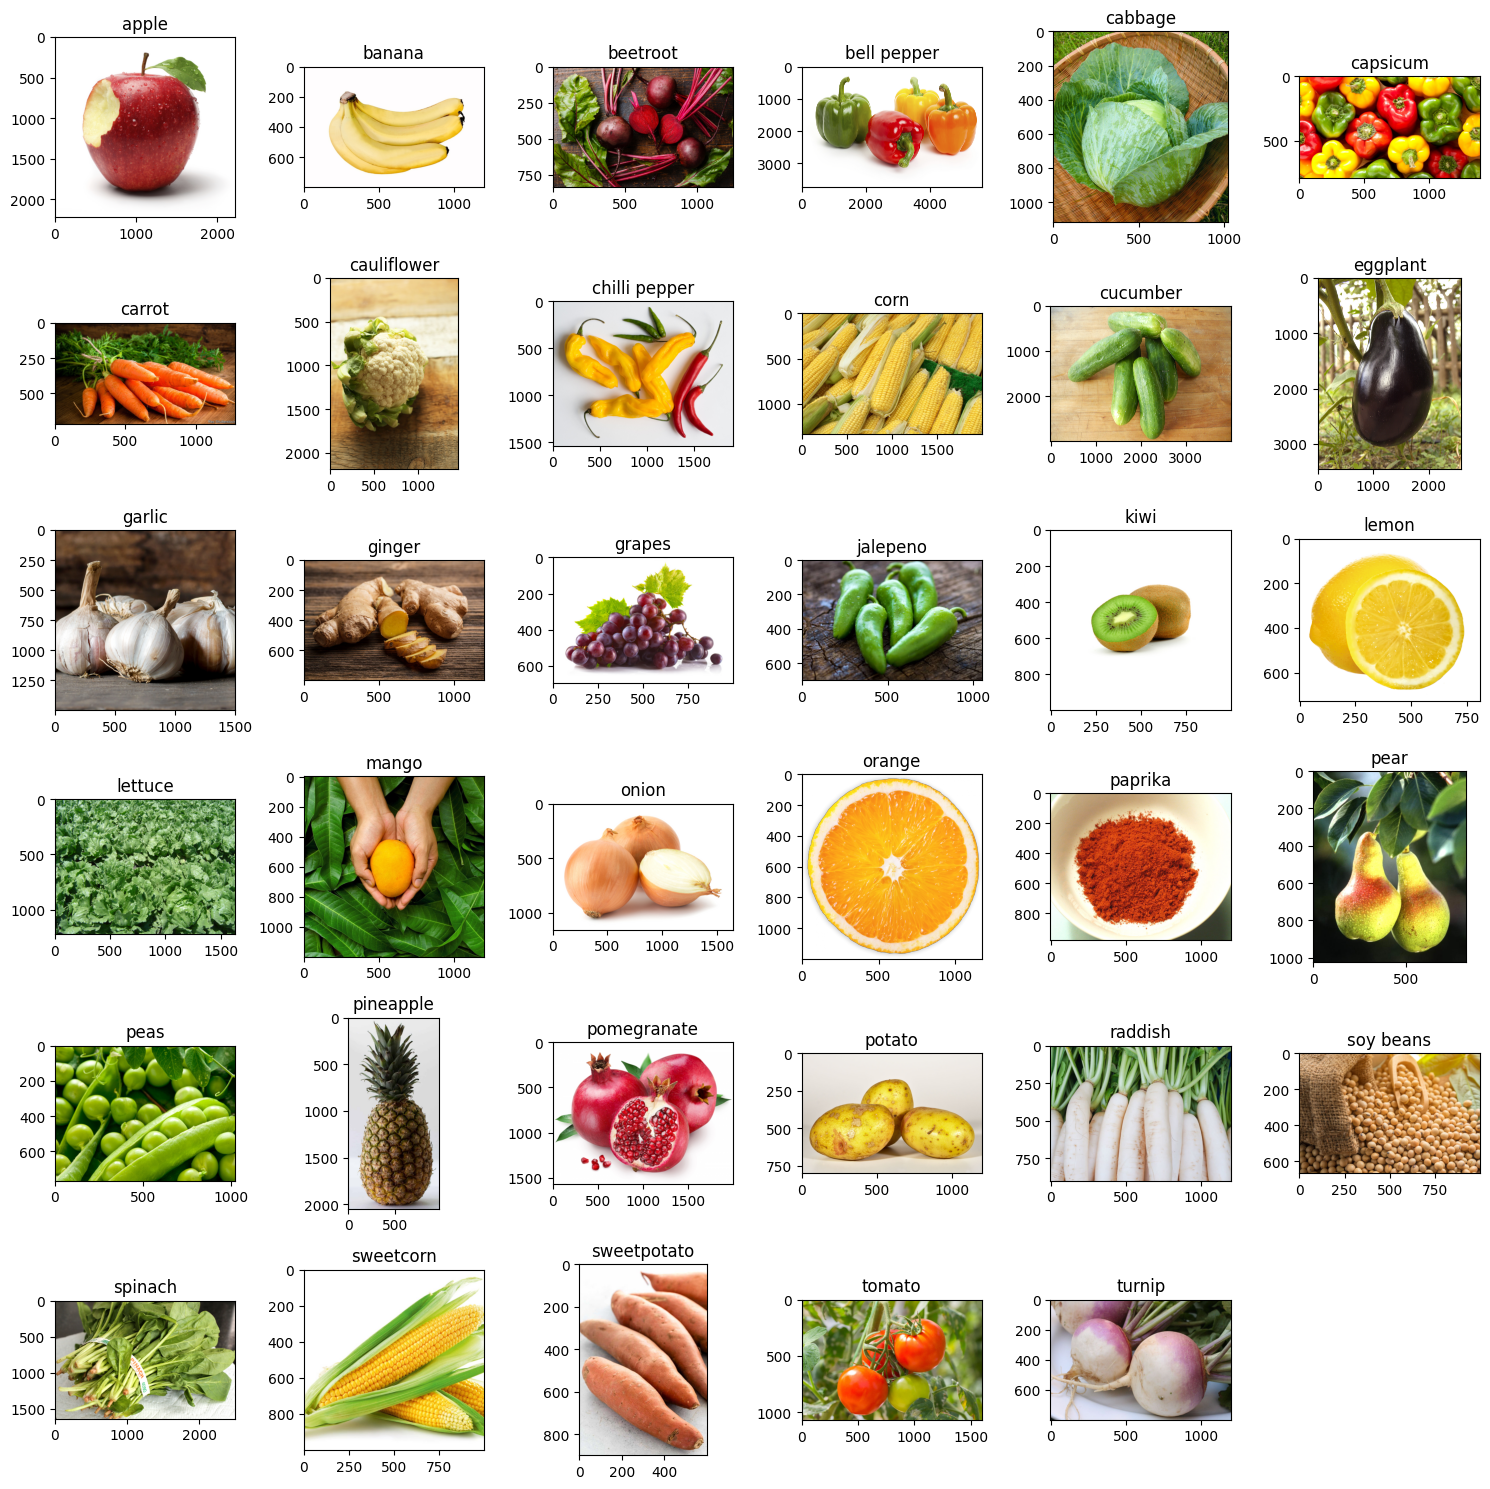

In [66]:
df_unique = df_train.drop_duplicates(subset=["label"]).reset_index()

plt.figure(figsize=(15,15))
for pos in range(1, len(df_unique)):
    plt.subplot(6,6,pos)
    plt.imshow(plt.imread(df_unique["image"][pos-1]))
    plt.title(df_unique["label"][pos-1])
    plt.tight_layout()

In [67]:
df_train.to_csv(project_dir + "\\data\\train_csv.csv")
df_test.to_csv(project_dir + "\\data\\test_csv.csv")
df_val.to_csv(project_dir + "\\data\\val_csv.csv")